In [1]:
from periodic_orbits import is_periodic, is_equilibrium, stg_coordinate, get_periodic_domains
from ode_functions import theta_from_param,ic_function, fun, convert_to_dict, get_parameter_node, get_ic_domain, plot_projections, plot_time_series, plot_phase_projection
from ipynb.fs.full.ode_functions import *
from periodic_orbits2 import check_sequence
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.decomposition import PCA

In [2]:
#decay rates
decays = {'d_p' : 1, 'd_mc' : 1, 'd_mn' : 1}

#hill coefficient
n = 90

#ode solver parameters
t0 = 0
tf = 100

In [3]:
#Import parameters
mball = pd.read_csv("Parameter_datasets/P1MBBW50Nodes.csv", header = None)#csv is 50 parameter sets, each as a row
mb_params = convert_to_dict_2(mball)

In [9]:
# #Import parameters

mb1 = pd.read_csv("Parameter_datasets/P1MBBWnode1.csv", header = None)
mbparams1 = convert_to_dict(mb1)

# mb2 = pd.read_csv("Parameter_datasets/P1MBBWnode2.csv", header = None)
# mbparams2 = convert_to_dict(mb2)

# mb3 = pd.read_csv("Parameter_datasets/P1MBBWnode3.csv", header = None)
# mbparams3 = convert_to_dict(mb3)

# mb4 = pd.read_csv("Parameter_datasets/P1MBBWnode4.csv", header = None)
# mbparams4 = convert_to_dict(mb4)

# mb5 = pd.read_csv("Parameter_datasets/P1MBBWnode5.csv", header = None)
# mbparams5 = convert_to_dict(mb5)

# mb6 = pd.read_csv("Parameter_datasets/P1MBBWnode6.csv", header = None)
# mbparams6 = convert_to_dict(mb6)

# mb7 = pd.read_csv("Parameter_datasets/P1MBBWnode7.csv", header = None)
# mbparams7 = convert_to_dict(mb7)

# mb8 = pd.read_csv("Parameter_datasets/P1MBBWnode8.csv", header = None)
# mbparams8 = convert_to_dict(mb8)

# mb9 = pd.read_csv("Parameter_datasets/P1MBBWnode9.csv", header = None)
# mbparams9 = convert_to_dict(mb9)

# mb10 = pd.read_csv("Parameter_datasets/P1MBBWnode10.csv", header = None)
# mbparams10 = convert_to_dict(mb10)

# mb_params = [mbparams1, mbparams2, mbparams3, mbparams4, mbparams5, mbparams6, mbparams7, mbparams8, mbparams9,
#              mbparams10]

In [10]:
mb_params.append(mbparams1)

In [4]:
#generate ICs in 111 region of parameter 1
mb_ICs = []
random.seed(0)
for i in range(10):
    mb_ICs.append(ic_function("111", mb_params[0]))#can split at 111

In [6]:
%store mb_ICs

Stored 'mb_ICs' (list)


In [11]:
#compute orbit lengths for all parameter, initial condition combinations
mb_lengths = []#store orbit lengths, each set of 10 lengths corresponds to different ICs within same parameter
mb_sizes = []
mb_error_params = []
for i in range(len(mb_params)):
    try:
        param = mb_params[i]
        theta = theta_from_param(param)
        for IC in mb_ICs:
            sol = scipy.integrate.solve_ivp(lambda t,y: fun(t,y,param,n,decays), [0,tf], y0 = IC, method = 'BDF')
#             output = get_periodic_domains(sol.y,theta,num_periods_to_verify = 2)
#             mb_lengths.append(len(output))
#             mb_sizes.append(upper_double_id(output))
    except ValueError:
        mb_error_params.append(i)

print(mb_error_params)

[20]


In [12]:
good_mb_params = []
mb_lengths = []#store orbit lengths, each set of 10 lengths corresponds to different ICs within same parameter
mb_sizes = []

for i in range(len(mb_params)):
    if i not in mb_error_params:
        good_mb_params.append(i)

for i in good_mb_params:#only indices that don't fail for any of selected ICs
    param = mb_params[i]#select good params from original list
    theta = theta_from_param(param)
    for IC in mb_ICs:
        sol = scipy.integrate.solve_ivp(lambda t,y: fun(t,y,param,90,decays), [0,100], y0 = IC, method = 'BDF')
        output = get_periodic_domains(sol.y,theta,num_periods_to_verify = 2)
        mb_lengths.append(len(output))
        mb_sizes.append(lower_double_id(output))#500

In [15]:
%store mb_sizes

Stored 'mb_sizes' (list)


In [13]:
#observe orbit lengths (columns are different initial conditions)
npendpts = np.linspace(0,500,51)
endpts = []
for i in npendpts:
    endpts.append(int(i))
for i in range(len(endpts)-1):
    print('mb_param', i, ':', mb_lengths[endpts[i]:endpts[i+1]])

mb_param 0 : [72, 4, 12, 36, 72, 64, 15, 2, 36, 36]
mb_param 1 : [6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
mb_param 2 : [48, 4, 4, 50, 110, 36, 4, 4, 5, 96]
mb_param 3 : [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
mb_param 4 : [10, 10, 9, 9, 9, 9, 9, 9, 27, 10]
mb_param 5 : [7, 8, 8, 8, 7, 7, 8, 7, 8, 8]
mb_param 6 : [10, 10, 10, 10, 10, 10, 10, 10, 9, 10]
mb_param 7 : [27, 9, 10, 10, 10, 10, 10, 10, 10, 10]
mb_param 8 : [10, 10, 9, 9, 10, 10, 9, 117, 10, 10]
mb_param 9 : [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
mb_param 10 : [7, 7, 7, 7, 8, 7, 7, 7, 7, 7]
mb_param 11 : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
mb_param 12 : [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
mb_param 13 : [7, 7, 7, 7, 8, 7, 7, 7, 7, 7]
mb_param 14 : [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
mb_param 15 : [7, 8, 8, 7, 8, 7, 8, 7, 8, 7]
mb_param 16 : [18, 9, 126, 18, 180, 160, 99, 126, 9, 192]
mb_param 17 : [7, 8, 7, 8, 8, 7, 8, 8, 7, 7]
mb_param 18 : [7, 8, 7, 7, 7, 7, 8, 8, 7, 7]
mb_param 19 : [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
mb_param 20 : [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
mb_param

No consistency here... Go back through and identify by size, not length (expect an upper double loop)

In [14]:
#observe orbit lengths (columns are different initial conditions)
for i in range(len(endpts)-1):
    print('mb_param', i, ':', mb_sizes[endpts[i]:endpts[i+1]])

mb_param 0 : ['Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small']
mb_param 1 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
mb_param 2 : ['Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small']
mb_param 3 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
mb_param 4 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
mb_param 5 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
mb_param 6 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
mb_param 7 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
mb_param 8 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
mb_param 9 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Larg

Now we see consistent results. Use this identifier for linear connection and PCA.

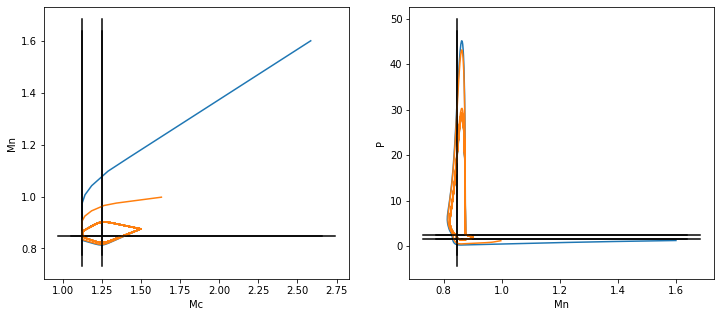

In [15]:
#plotting framework
param = mb_params[13]
sol0 = scipy.integrate.solve_ivp(lambda t,y: fun(t,y,param,n,decays), [0,tf], y0 = mb_ICs[2], method = 'BDF')
sol1 = scipy.integrate.solve_ivp(lambda t,y: fun(t,y,param,n,decays), [0,tf], y0 = mb_ICs[3], method = 'BDF')

fig,(ax1,ax2) = plot_projections(sol0, param)
plot_projections(sol1, param, axs = (ax1, ax2))
# ax1.set_xlim(1,2.75)
# # ax1.set_ylim(0.3,0.8)
# ax2.set_xlim(0.6,1)
# ax2.set_ylim(0,8.5)

Now, examine all possible lines of parameters between length 6 and a length 8 orbits to see if hysteresis is a possibility.

Edit: separate into large and small EXCEPT for mb_params[4] to see if that eliminate blowup problem in linear connections check stage.

In [39]:
len(mb_params)

9

In [38]:
#remove param set 4
mb_params.pop(4)

{'LMcMc': 0.4375,
 'LMcP': 2.0,
 'LMcPT': 0.875,
 'LMnMc': 0.4375,
 'LMnP': 0.65625,
 'LPMn': 0.25,
 'thetaMcMc': 1.5078125,
 'thetaMcP': 1.25,
 'thetaMcPT': 1.75,
 'thetaMnMc': 1.53515625,
 'thetaPMn': 0.478515625,
 'UMcMc': 0.875,
 'UMcP': 2.328125,
 'UMcPT': 1.0,
 'UMnMc': 0.875,
 'UMnP': 0.875,
 'UPMn': 2.0}

In [40]:
# #begin edit
# mb_params = 
large, small = separate(mb_params, '111')

In [41]:
line_list = generate_all_lines(small, large, 50)

This is where error occurs... It seems as though mb_param 4 might have something odd happening. If we eliminate that set, will it run? How to remove? That requires remembering how my code works.

In [42]:
%%time
check_list(line_list, n = 90)

CPU times: user 3min 33s, sys: 2.53 s, total: 3min 36s
Wall time: 3min 46s


[False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False]

Oh hey that actually worked, surpringly! So now we have another parameter node for which there are directional differences that require more investigation. Investigate via plotting or other better method?

### PCA

In [12]:
#0 is small, 1 is large
mb_param_colors = [0,0,1,1,1,1,1,1,0,1]

mbdf1 = pd.DataFrame.from_dict(mbparams1, orient = 'index')
mbdf1 = mbdf1.T
mbdf2 = pd.DataFrame.from_dict(mbparams2, orient = 'index')
mbdf2 = mbdf2.T
mbdf3 = pd.DataFrame.from_dict(mbparams3, orient = 'index')
mbdf3 = mbdf3.T
mbdf4 = pd.DataFrame.from_dict(mbparams4, orient = 'index')
mbdf4 = mbdf4.T
mbdf5 = pd.DataFrame.from_dict(mbparams5, orient = 'index')
mbdf5 = mbdf5.T
mbdf6 = pd.DataFrame.from_dict(mbparams6, orient = 'index')
mbdf6 = mbdf6.T
mbdf7 = pd.DataFrame.from_dict(mbparams7, orient = 'index')
mbdf7 = mbdf7.T
mbdf8 = pd.DataFrame.from_dict(mbparams8, orient = 'index')
mbdf8 = mbdf8.T
mbdf9 = pd.DataFrame.from_dict(mbparams9, orient = 'index')
mbdf9 = mbdf9.T
mbdf10 = pd.DataFrame.from_dict(mbparams10, orient = 'index')
mbdf10 = mbdf10.T

mb_param_data = pd.concat([mbdf1,mbdf2,mbdf3,mbdf4,mbdf5,mbdf6,mbdf7,mbdf8,mbdf9,mbdf10])

mb_param_data['OrbitLength'] = mb_param_colors

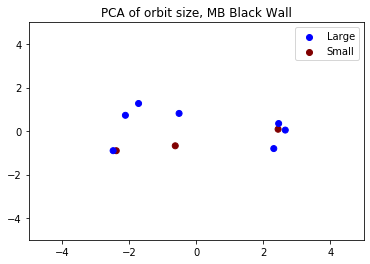

In [13]:
pca = PCA(n_components = 2)
pca.fit(mb_param_data.iloc[:,0:17])
mb_pca = pca.transform(mb_param_data.iloc[:,0:17])

labels = mb_param_data.loc[:,'OrbitLength']
label_colors = {0:'maroon',1:'blue'}
cvec = [label_colors[label] for label in labels]
plt.scatter(mb_pca[:,0],mb_pca[:,1], c = cvec)
plt.scatter(25,25,c = 'blue',label = 'Large')#point at (25,25) just for labeling purposes
plt.scatter(25,25,c = 'maroon', label = 'Small')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.title('PCA of orbit size, MB Black Wall')
plt.legend(loc = 'best')
# plt.savefig('pca_all_attributes.png')
plt.show()
plt.close()

This one doesn't appear to have much spatial separation by orbit size.